# ch 5. 오차항 가정 진단

선형 회귀 모델은 오차항에 대해 몇가지 가정을 한 뒤, 회귀식을 도출하였습니다. 선형 회귀 모델은 오차에 대한 몇 가지 가정을 하고 회귀식을 도출했습니다.

$$ \text{1. 오차항(}\epsilon_{i}\text{)의 평균은 0이고 분산은 }\sigma^2 \text{이다. (등분산성)}$$

$$\text{2. 오차항(}\epsilon_{i}\text{들은 서로 독립이다. (독립성)}$$

$$\text{3. 오차항}\epsilon_{i}\text{은 정규분포를 따른다. (정규성)}$$

statsmodels summary를 보면 이 오차항들에 대한 가정이 얼마나 지켜졌는지 검정한 값들을 확인할 수 있습니다.

## 모델 준비

종속 변수 로그 변환을 제외하고 모델을 학습시켜 보겠습니다.

In [10]:
from utils import load_house_dataset

x_train, x_test, y_train, y_test = load_house_dataset()
x_train = x_train["sqft_living"]
x_test = x_test["sqft_living"]

In [12]:
import statsmodels.api as sm

x_constant_train = sm.add_constant(x_train, has_constant="add")
model = sm.OLS(y_train, x_constant_train)
results = model.fit()

In [13]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.493
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                 1.684e+04
Date:                Mon, 24 Jul 2023   Prob (F-statistic):               0.00
Time:                        13:07:29   Log-Likelihood:            -2.4025e+05
No. Observations:               17290   AIC:                         4.805e+05
Df Residuals:                   17288   BIC:                         4.805e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -4.429e+04   4921.168     -9.000      0.000   -5.39e+04   -3.46e+04
sqft_living   281.4364      2.169    129.760      0.000     277.185     285.688
==============================================================================
Omnibus:                    11803.100   Durbin-Watson:                   1.988
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           413795.032
Skew:                           2.816   Prob(JB):                         0.00
Kurtosis:                      26.295   Cond. No.                     5.60e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.6e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## 오차항의 정규성 진단

statsmodels summary의 세 번째 표를 보면 오차항이 정규성을 띄는지 여부를 여러 기법을 통해서 구하였습니다.

### skewness
- 확률 분포가 중심으로부터 치우친 정도
- 양수일 경우엔 왼쪽, 음수일 경우엔 오른쪽으로 치우친 형태
- 절대값이 2보다 작으면 정규분포에서 크게 벗어나지 않는다고 봄 

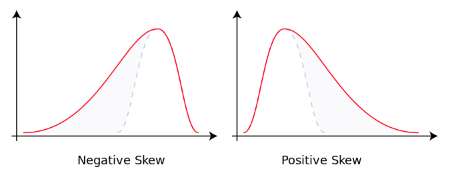

### kurtosis
- 확률 분포가 중심으로 몰려서 뾰족한 정도
- 양수면 정규분포보다 뾰족하고 음수면 정규분포보다 완만 
-  절대값이 7보다 작으면 정규성을 벗어나지 않는다고 봄

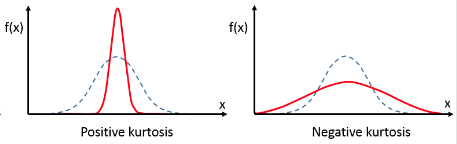

위 표에서는 skewness가 2.6, kurtosis가 26.9로 나왔습니다. 실제로 약간 왼쪽으로 치우친 뾰족한 종모양을 띄는지 그려보겠습니다.

<Axes: >

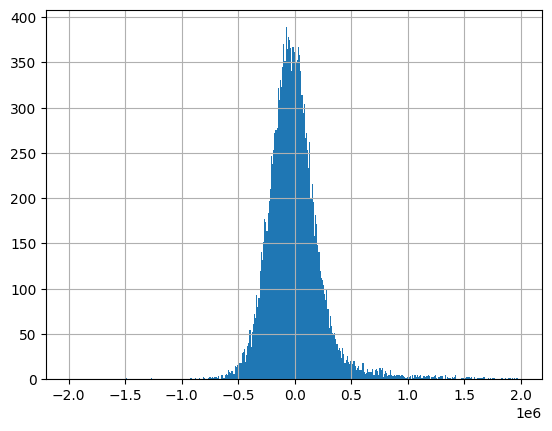

In [14]:
import numpy as np

y_train_pred = results.predict(x_constant_train)
train_err = y_train - y_train_pred 
train_err.hist(bins=np.arange(-2000000, 2000000, 10000))

오차항의 분포가 지나치게 뾰족하여 정규분포를 벗어납니다. 이번에는 한번 독립 변수와 종속 변수에 로그를 씌운 다음, 회귀식을 도출한 뒤에 오차항의 분포를 확인해보겠습니다.

In [15]:
x_log_train = np.log1p(x_train)
y_log_train = np.log1p(y_train)
x_constant_log_train = sm.add_constant(x_log_train, has_constant="add")
log_model = sm.OLS(y_log_train, x_constant_log_train)
log_results = log_model.fit()
log_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.453
Model:                            OLS   Adj. R-squared:                  0.453
Method:                 Least Squares   F-statistic:                 1.432e+04
Date:                Mon, 24 Jul 2023   Prob (F-statistic):               0.00
Time:                        13:08:05   Log-Likelihood:                -8221.8
No. Observations:               17290   AIC:                         1.645e+04
Df Residuals:                   17288   BIC:                         1.646e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           6.7668      0.053    128.751      0.000       6.664       6.870
sqft_living     0.8320      0.007    119.674      0.000       0.818       0.846
==============================================================================
Omnibus:                       94.777   Durbin-Watson:                   2.011
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               88.447
Skew:                           0.143   Prob(JB):                     6.22e-20
Kurtosis:                       2.798   Cond. No.                         137.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<Axes: >

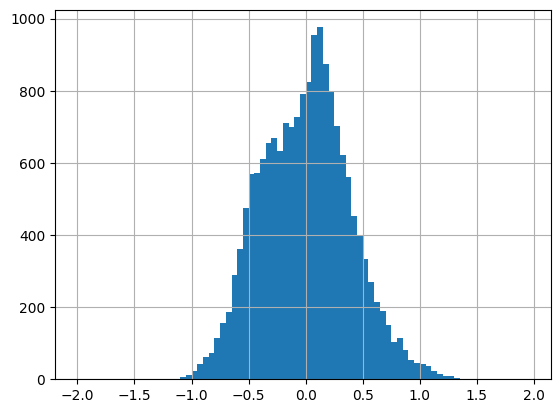

In [21]:
y_log_train_pred = log_results.predict(x_constant_log_train)
log_train_err = y_log_train - y_log_train_pred 
log_train_err.hist(bins=np.arange(-2, 2, 0.05))

skew는 0.142, kurtosis는 2.787로 허용 가능한 범위 내로 좁혀진 것을 확인할 수 있습니다.

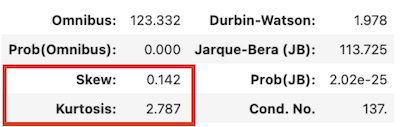

### 정규성 테스트

세 번째 표를 보면 오차항이 정규성을 따르는지를 검정한 값들을 확인할 수 있습니다.

- Omnibus
    - kurtosis와 skewness를 반영하여 오차항의 정규성을 측정한 정도
    - 3 미만이면 정규성을 위반한다고 봄
- Prob(Omnibus)
    - Omnibus 값을 이용해서 측정한 p-value
- Jarque-Bera
    - Omnibus와 비슷하게 kurtosis와 skeness를 사용하여 오차항의 정규성을 측정하는 척도
- Prob(Jarque-Bera)
    - Jarque-Bera 값을 이용해서 측정한 p-value

예제로 돌아가보면 독립 변수와 종속 변수에 로그를 씌우기 전과 후 모두 Omnibus와 Jarque-Bera 값이 정규성을 위배하지 않습니다.

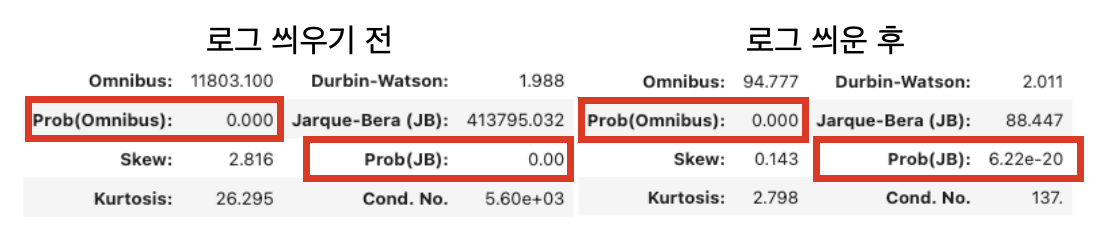

## 오차항의 독립성 검정

오차항의 독립성은 Durbin-Watson 값으로 검정할 수 있습니다.

### Durbin-Watson
- 회귀 모델에서 잔차들 사이의 자기상관을 검토하여 모델의 적합성을 평가하는 데에 활용됩니다.
- 0과 4 사이의 값을 가지며, 2에 가까울 수록 자기 상관관계가 없음
- 0 ~ 2 사이는 양의 자기 상관관계, 2 ~ 4 사이는 음의 자기 상관 관계

예제로 돌아가보면 로그를 씌우기 전이나 후나 2에 가까운 수준으로 등분산 가정은 만족하는 것으로 보입니다. 

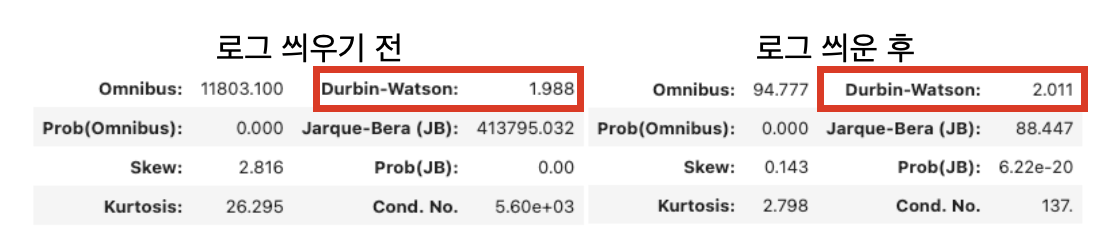

## 정리

이번 챕터에서는 statsmodels summary에 포함된 오차항 가정들에 대한 검정 결과들을 알아보았습니다. 이를 통해서 선형 모델이 오차항 전제 조건을 위배하지 않도록 데이터들을 전처리하여 모델을 다시 학습시킬 수 있었습니다.